In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Read data and get data overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/spotify_final.csv')
df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,album_release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,tempo,time_signature
0,2RkZ5LkEzeHGRsmDqKwmaJ,Ordinary,Alex Warren,1,1,0,Global,2025-06-11,95,False,...,2024-09-26,0.368,0.694,2,-6.141,1,0.704000,0.000007,168.115,3
1,42UBPzRMh5yyz0EDPr6fr1,Manchild,Sabrina Carpenter,2,-1,48,Global,2025-06-11,89,True,...,2025-06-05,0.731,0.685,7,-5.087,1,0.122000,0.000000,123.010,4
2,0FTmksd2dxiE5e3rWyJXs6,back to friends,sombr,3,0,1,Global,2025-06-11,98,False,...,2024-12-27,0.436,0.723,1,-2.291,1,0.000094,0.000088,92.855,4
3,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,Lady Gaga; Bruno Mars,4,0,-1,Global,2025-06-11,91,False,...,2025-03-07,0.519,0.601,6,-7.727,0,0.289000,0.000000,157.964,3
4,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,5,1,0,Global,2025-06-11,100,False,...,2024-05-17,0.747,0.507,2,-10.171,1,0.200000,0.060800,104.978,4


In [4]:
df.columns

Index(['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement',
       'weekly_movement', 'country', 'snapshot_date', 'popularity',
       'is_explicit', 'duration_ms', 'album_name', 'album_release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'acousticness',
       'instrumentalness', 'tempo', 'time_signature'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522704 entries, 0 to 522703
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   spotify_id          522704 non-null  object 
 1   name                522695 non-null  object 
 2   artists             522704 non-null  object 
 3   daily_rank          522704 non-null  int64  
 4   daily_movement      522704 non-null  int64  
 5   weekly_movement     522704 non-null  int64  
 6   country             522704 non-null  object 
 7   snapshot_date       522704 non-null  object 
 8   popularity          522704 non-null  int64  
 9   is_explicit         522704 non-null  bool   
 10  duration_ms         522704 non-null  int64  
 11  album_name          522704 non-null  object 
 12  album_release_date  522704 non-null  object 
 13  danceability        522704 non-null  float64
 14  energy              522704 non-null  float64
 15  key                 522704 non-nul

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
daily_rank,522704.0,25.496476,14.431403,1.000000,13.0000,25.000,38.000000,50.000
daily_movement,522704.0,0.857327,6.441476,-49.000000,-1.0000,0.000,2.000000,49.000
weekly_movement,522704.0,2.494096,11.273914,-49.000000,-3.0000,0.000,4.000000,49.000
popularity,522704.0,75.662373,14.145782,0.000000,66.0000,77.000,87.000000,100.000
duration_ms,522704.0,207200.846397,47747.703457,41487.000000,173746.0000,204078.000,237485.000000,933407.000
danceability,522704.0,0.631018,0.145013,0.093900,0.5240,0.644,0.744000,0.988
energy,522704.0,0.610951,0.175153,0.001740,0.4840,0.618,0.747000,0.993
key,522704.0,5.371384,3.622043,0.000000,2.0000,6.000,9.000000,11.000
loudness,522704.0,-6.957477,2.849924,-54.341000,-8.4450,-6.588,-5.038000,2.605
mode,522704.0,0.628979,0.483078,0.000000,0.0000,1.000,1.000000,1.000


## Visualize

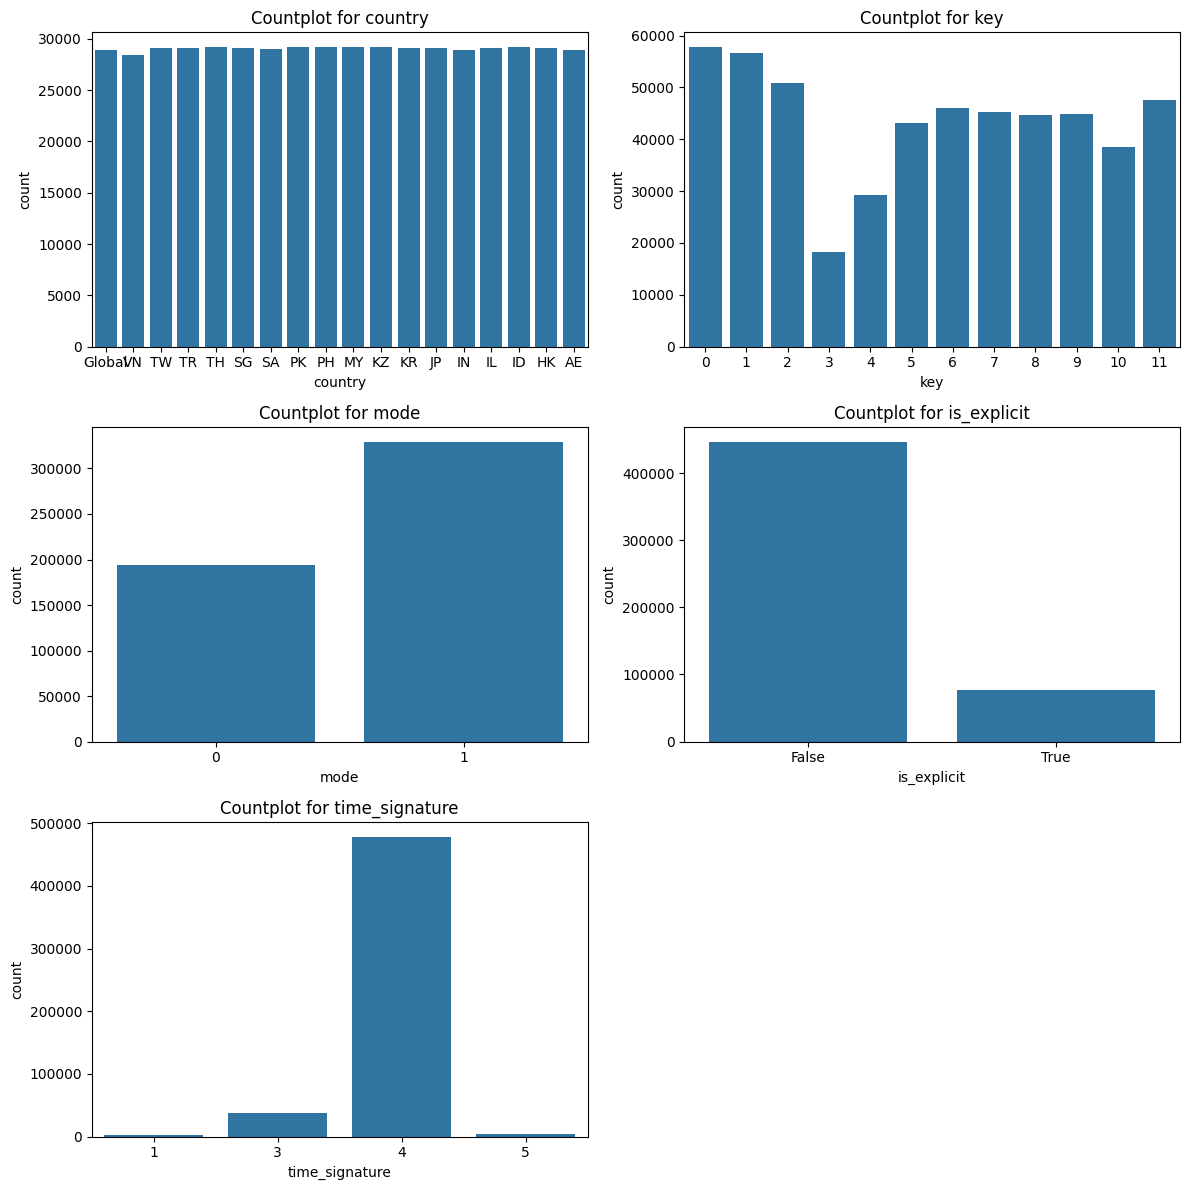

In [7]:
# countplot for discrete feature
col_to_plot = ['country', 'key', 'mode', 'is_explicit', 'time_signature']

num_cols = 2
num_rows = (len(col_to_plot) + num_cols - 1) // num_cols

plt.figure(figsize=(12, num_rows * 4))

for i, col in enumerate(col_to_plot, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot for {col}')

plt.tight_layout()
plt.show()


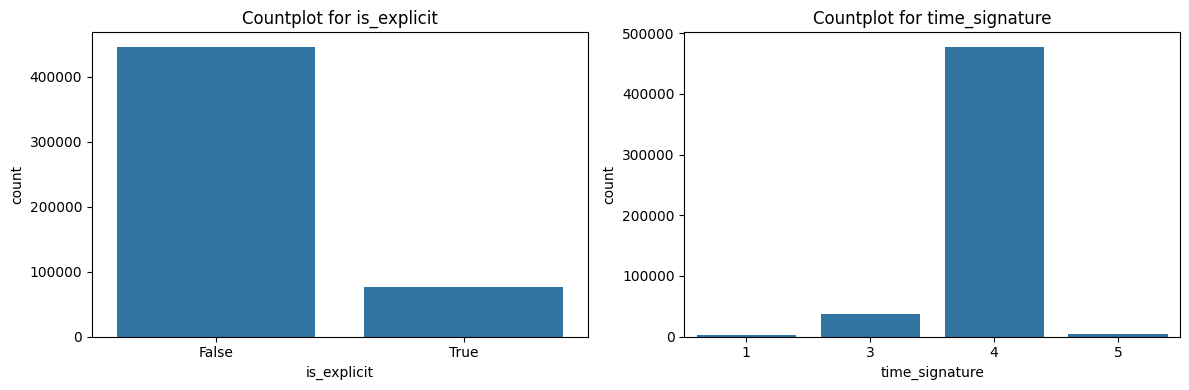

In [8]:
# countplot for discrete feature
col_to_plot = ['is_explicit', 'time_signature']

num_cols = 2
num_rows = (len(col_to_plot) + num_cols - 1) // num_cols

plt.figure(figsize=(12, num_rows * 4))

for i, col in enumerate(col_to_plot, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot for {col}')

plt.tight_layout()
plt.show()


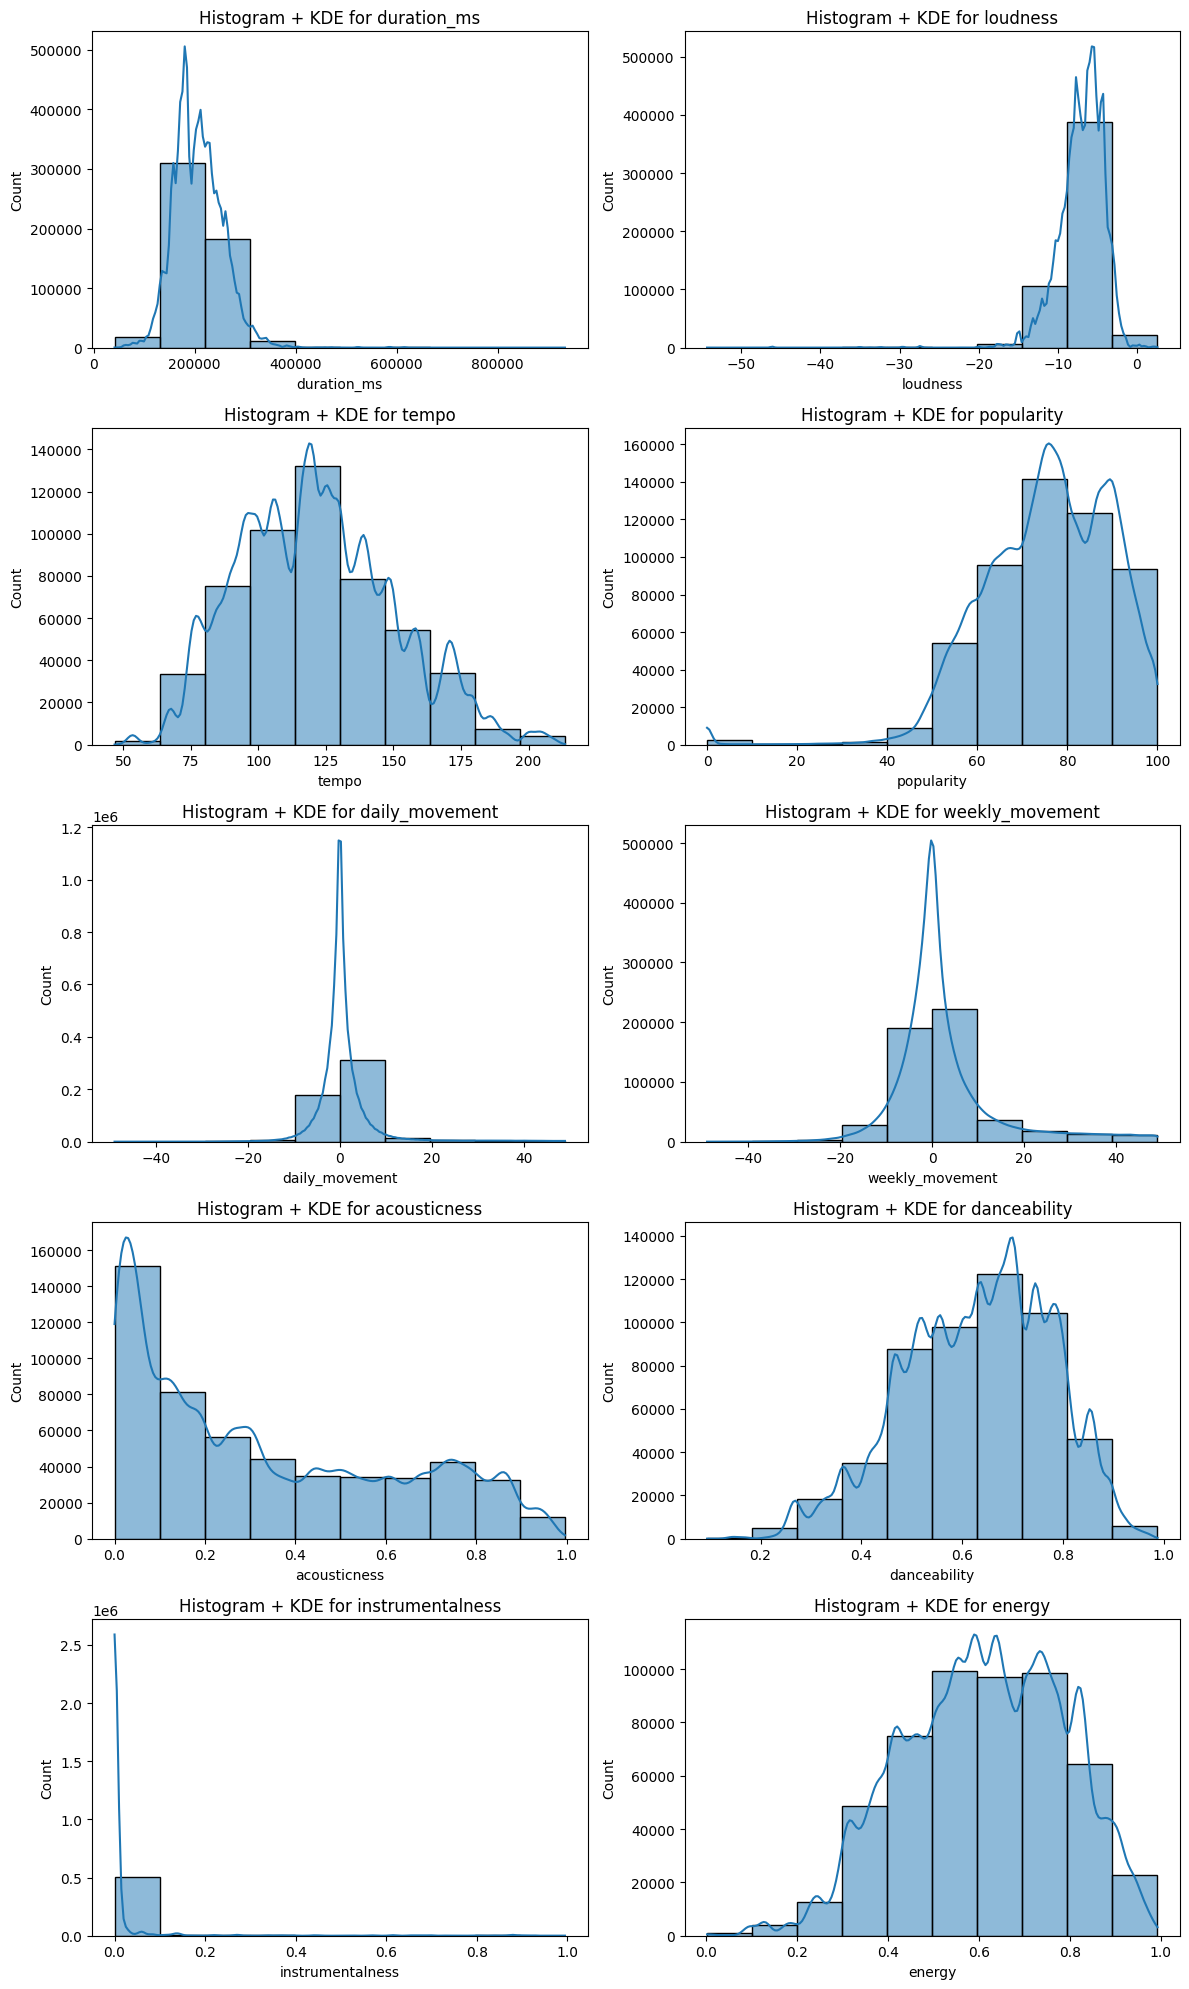

In [9]:
# hist plot + kde for continious feature
col_to_plot = [
    'duration_ms', 'loudness', 'tempo', 'popularity', 'daily_movement',
    'weekly_movement', 'acousticness', 'danceability',
    'instrumentalness', 'energy'
]

num_cols = 2
num_rows = (len(col_to_plot) + num_cols - 1) // num_cols

plt.figure(figsize=(12, num_rows * 4))

for i, col in enumerate(col_to_plot, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f'Histogram + KDE for {col}')

plt.tight_layout()
plt.show()


/tmp/ipython-input-642271221.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='bin', y=target_col, palette='viridis')
/tmp/ipython-input-642271221.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='bin', y=target_col, palette='viridis')
/tmp/ipython-input-642271221.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='bin', y=target_col, palette='viridis')
/tmp/ipython-input-642271221.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

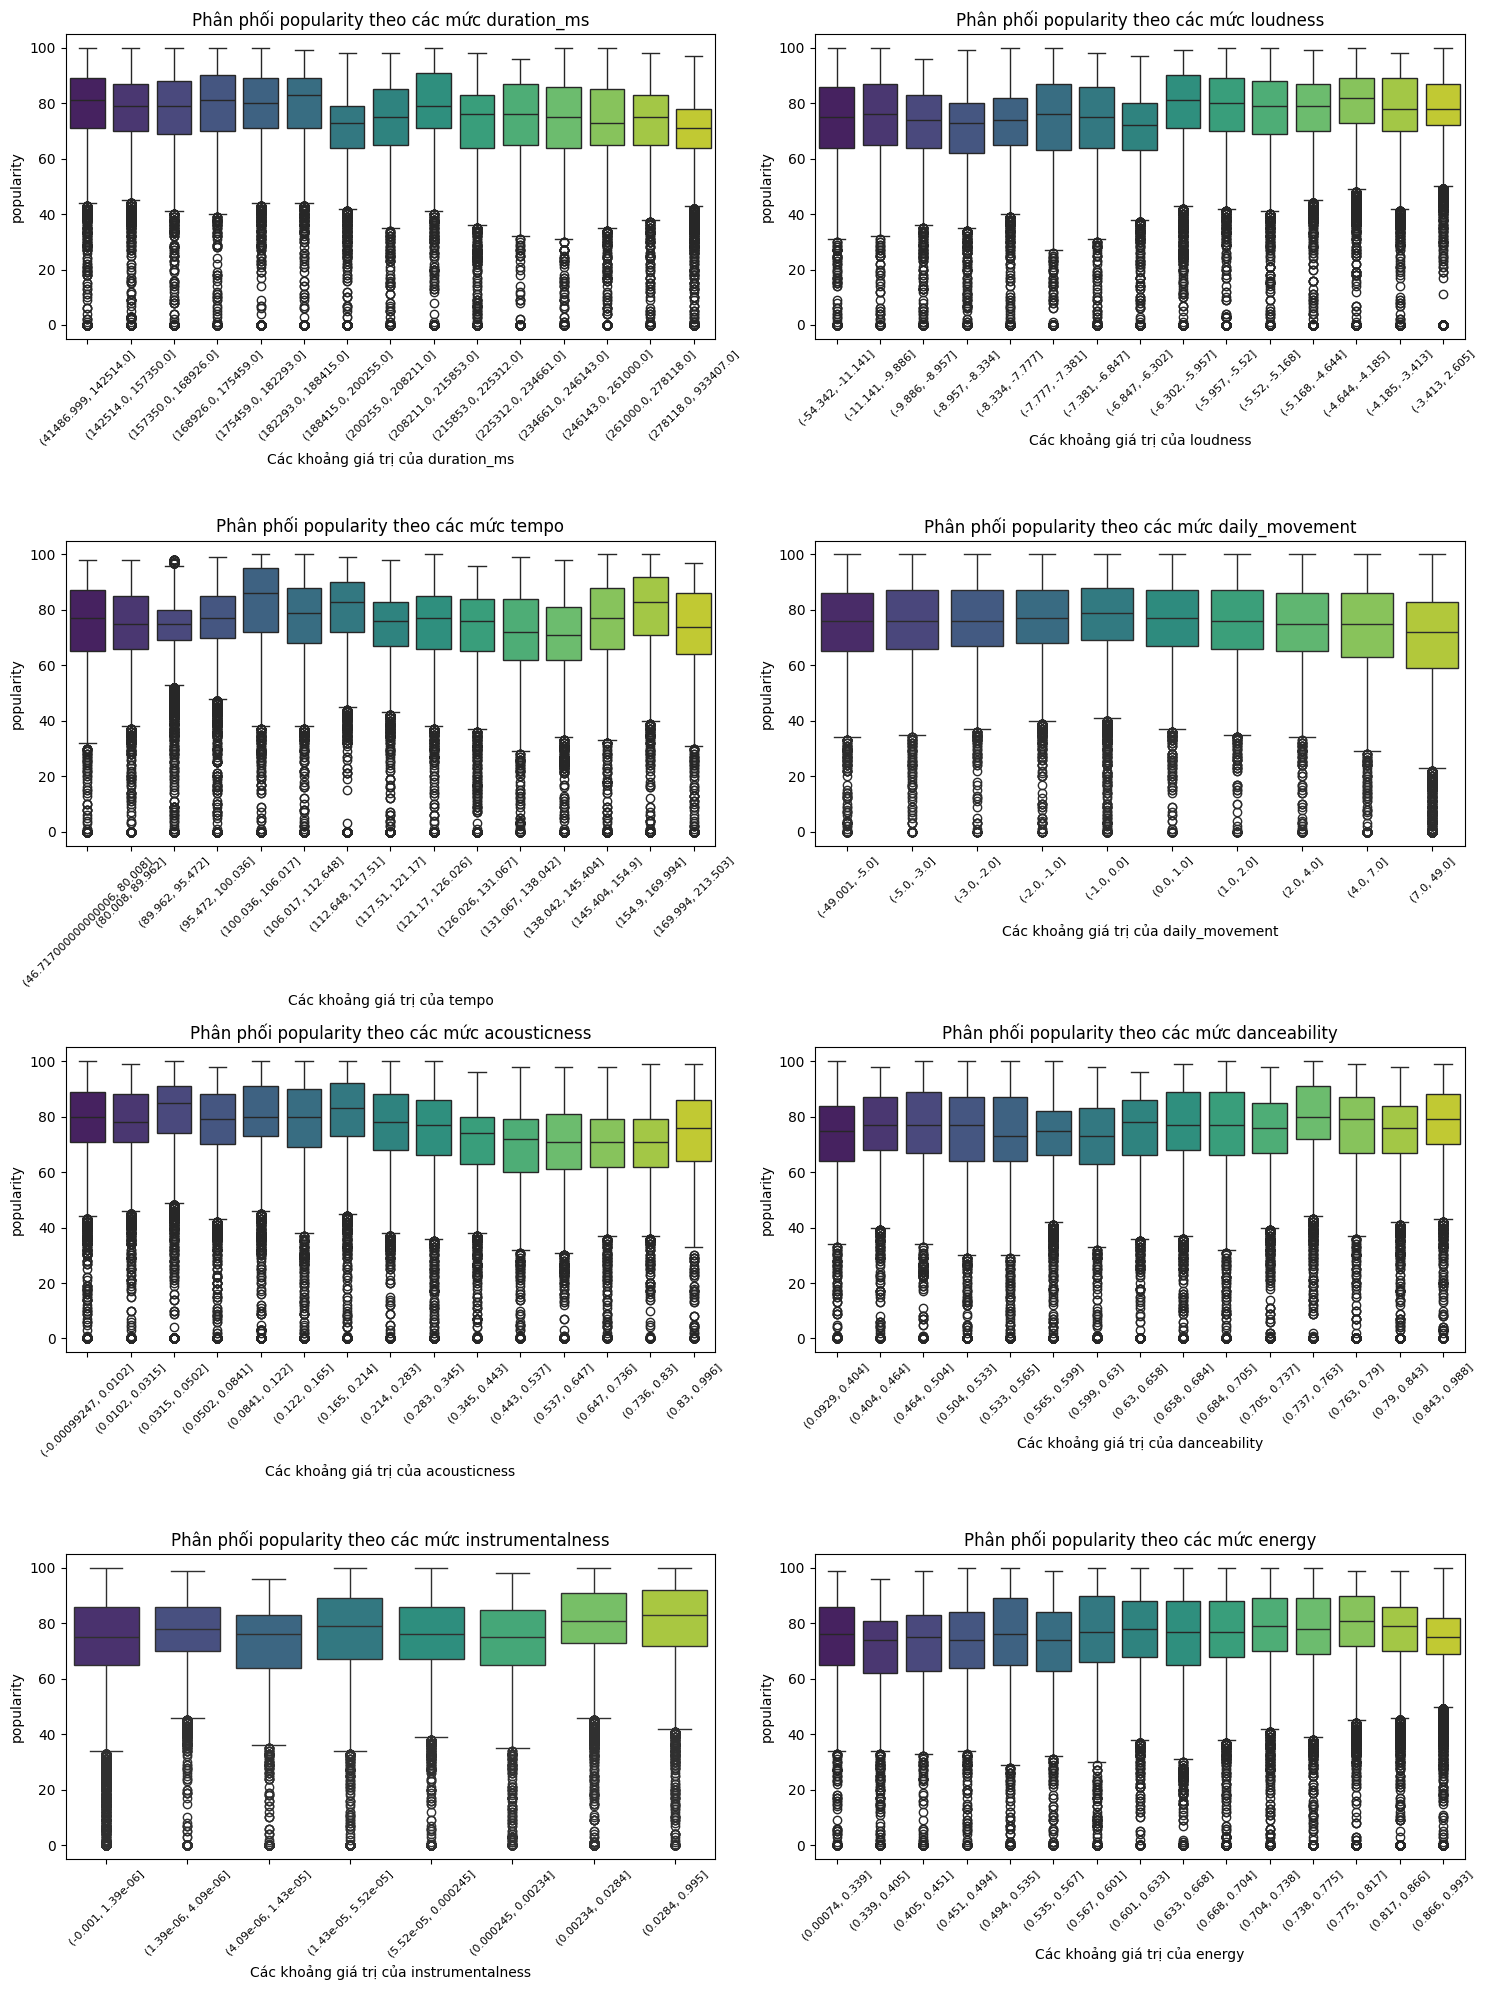

In [10]:
target_col = 'popularity'
compare_col = ['duration_ms', 'loudness', 'tempo', 'daily_movement',
               'acousticness', 'danceability', 'instrumentalness', 'energy']

num_cols = 2
num_rows = (len(compare_col) + num_cols - 1) // num_cols
plt.figure(figsize=(15, num_rows * 5))

for i, col in enumerate(compare_col, 1):
    plt.subplot(num_rows, num_cols, i)
    df['bin'] = pd.qcut(df[col], q=15, duplicates='drop')

    # Vẽ Boxplot cho từng giỏ
    sns.boxplot(data=df, x='bin', y=target_col, palette='viridis')

    # Trang trí lại trục X cho dễ đọc (chỉ lấy giá trị đại diện)
    plt.title(f'Phân phối {target_col} theo các mức {col}')
    plt.xticks(rotation=45, fontsize=8)
    plt.xlabel(f'Các khoảng giá trị của {col}')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Thời lượng trung bình bài hát theo Quốc gia')

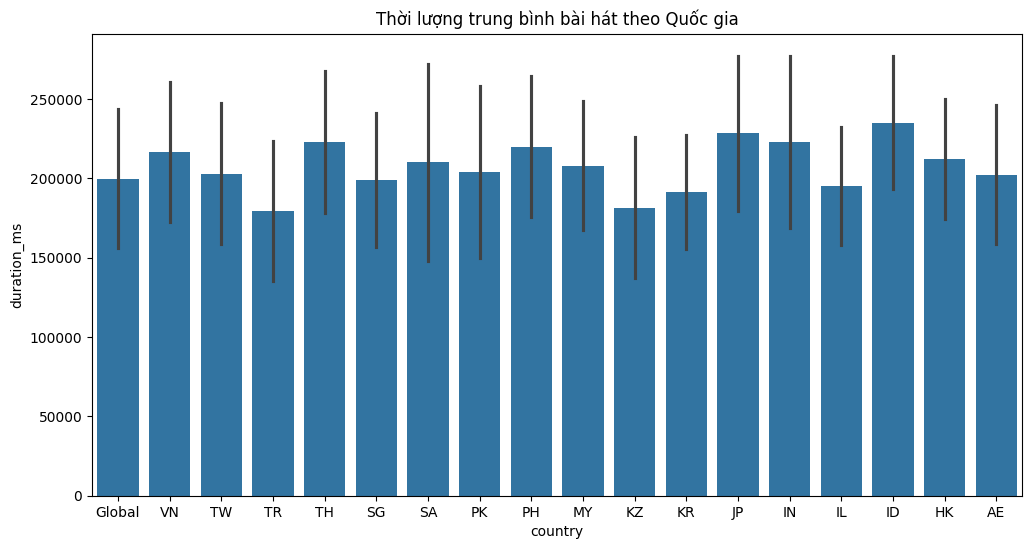

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='country', y='duration_ms', estimator='mean', errorbar='sd')
plt.title('Thời lượng trung bình bài hát theo Quốc gia')

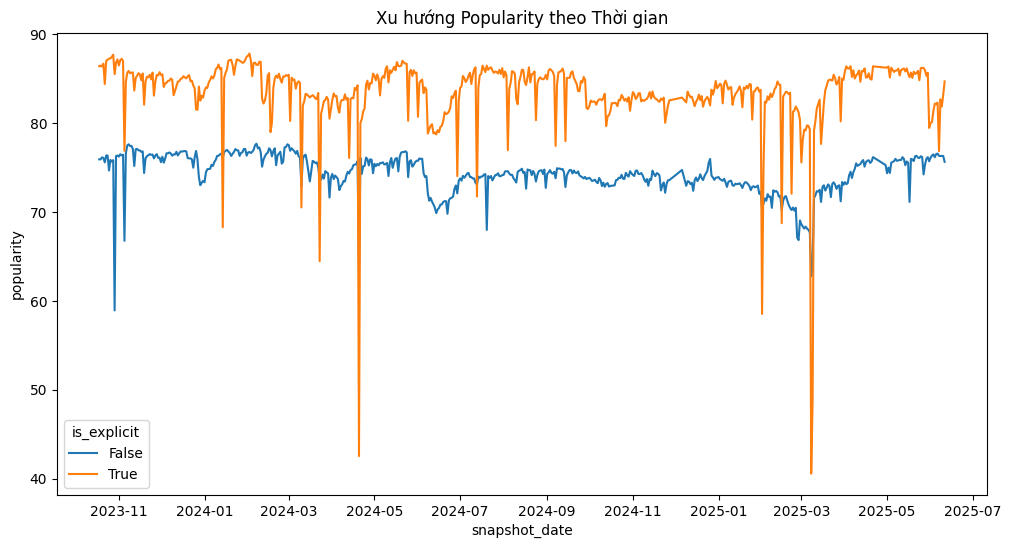

In [12]:
plt.figure(figsize=(12, 6))
# Chuyển snapshot_date sang datetime nếu chưa chuyển
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])
sns.lineplot(data=df, x='snapshot_date', y='popularity', hue='is_explicit', errorbar=None)
plt.title('Xu hướng Popularity theo Thời gian')
plt.show()

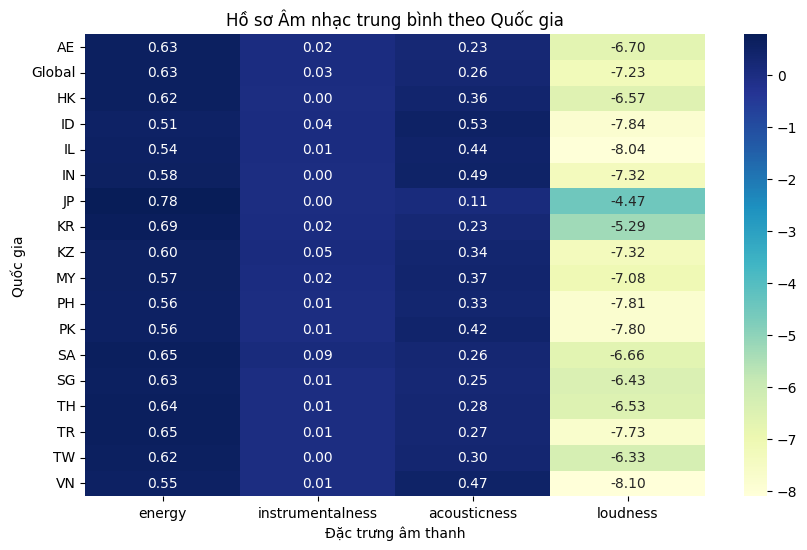

In [13]:
features = ['energy', 'instrumentalness', 'acousticness', 'loudness']

# Tính trung bình theo quốc gia
country_profile = df.groupby('country')[features].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(country_profile, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Hồ sơ Âm nhạc trung bình theo Quốc gia')
plt.ylabel('Quốc gia')
plt.xlabel('Đặc trưng âm thanh')
plt.show()

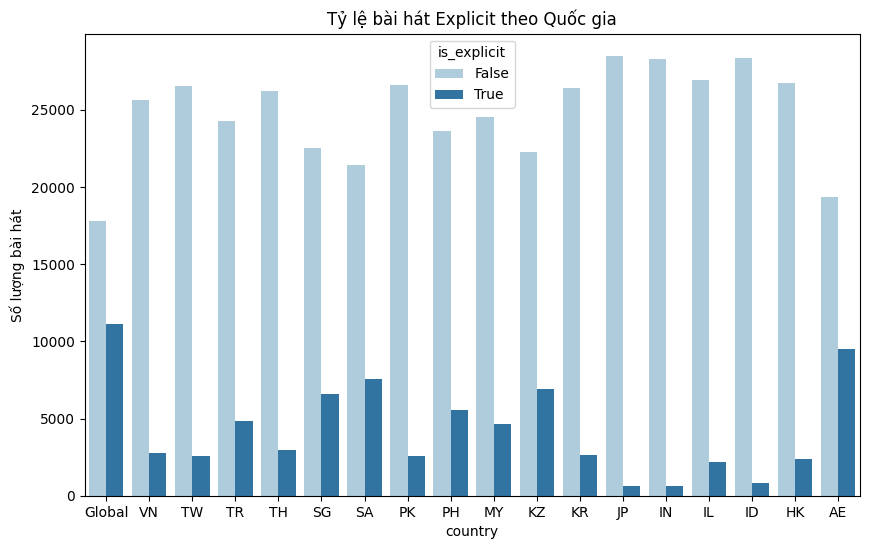

In [14]:
plt.figure(figsize=(10, 6))
# Vẽ biểu đồ đếm có phân nhóm
sns.countplot(data=df, x='country', hue='is_explicit', palette='Paired')
plt.title('Tỷ lệ bài hát Explicit theo Quốc gia')
plt.ylabel('Số lượng bài hát')
plt.show()

/tmp/ipython-input-1750965554.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, x='country', y='popularity', palette='Set3')


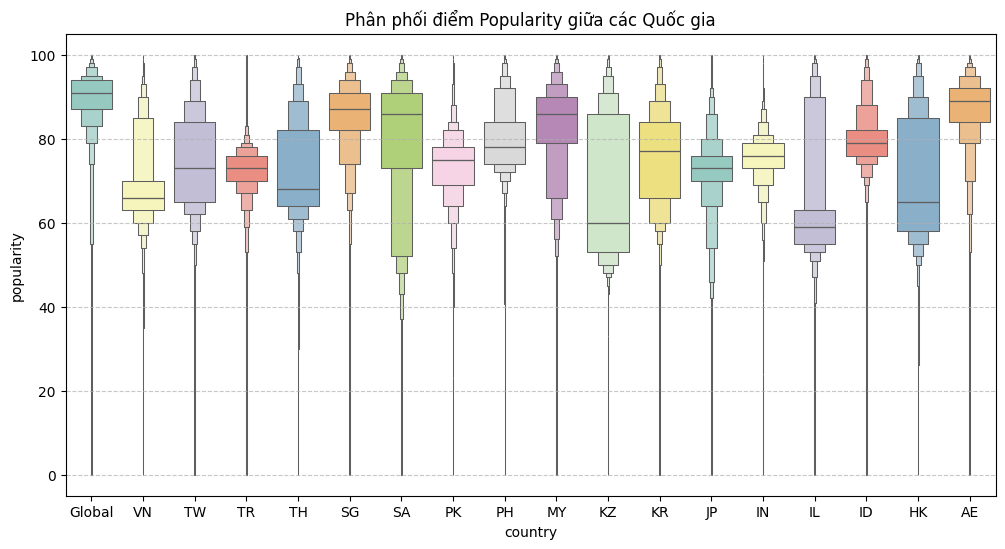

In [15]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df, x='country', y='popularity', palette='Set3')
plt.title('Phân phối điểm Popularity giữa các Quốc gia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

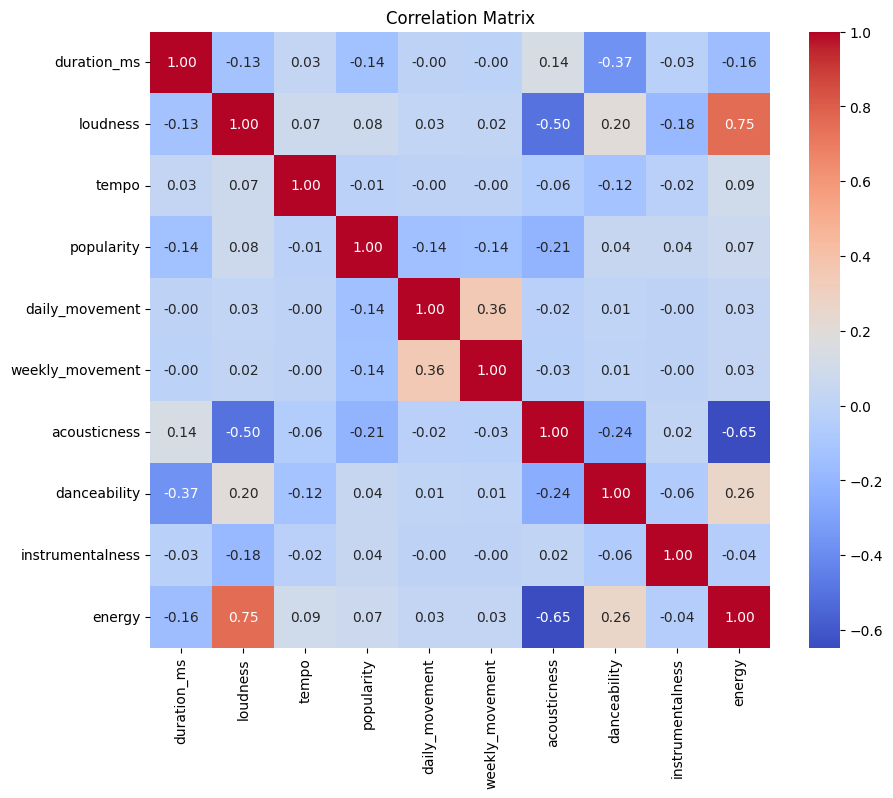

In [16]:
# correlation maxtric
numeric_cols = ['duration_ms', 'loudness', 'tempo', 'popularity', 'daily_movement', 'weekly_movement', 'acousticness', 'danceability', 'instrumentalness', 'energy']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering and Collection

In [17]:
def classify_popularity(score):
    if score >= 80:
        return 2  # Hit
    elif score >= 60:
        return 1  # Average
    else:
        return 0  # Low

df['popularity_class'] = df['popularity'].apply(classify_popularity)

<Axes: xlabel='popularity_class', ylabel='count'>

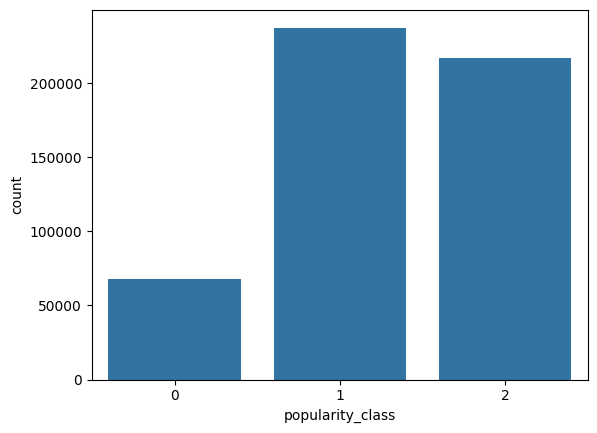

In [18]:
sns.countplot(data=df, x='popularity_class')

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df = df.sort_values(by=['spotify_id', 'snapshot_date'])

df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])
df['album_release_date'] = pd.to_datetime(df['album_release_date'])

# Đặc trưng từ Snapshot Date (Thời điểm xếp hạng)
df['snapshot_month'] = df['snapshot_date'].dt.month
df['snapshot_dayofweek'] = df['snapshot_date'].dt.dayofweek
df['is_weekend'] = (df['snapshot_dayofweek'] >= 5).astype(int)

# Số ngày bài hát ra mắt tính đến ngày xếp hạng (Độ mới/tuổi của bài hát)
df['days_since_release'] = (df['snapshot_date'] - df['album_release_date']).dt.days

# Tạo đặc trưng độ trễ cho daily_movement
df['daily_movement_lag1'] = df.groupby('spotify_id')['daily_movement'].shift(1).fillna(0)

In [8]:
df['is_explicit'] = df['is_explicit'].astype(int)

ohe_cols = ['country']
df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)

bool_cols = df.select_dtypes(include=['bool']).columns

for col in bool_cols:
    df[col] = df[col].astype(int)

df = df.sort_values(by='snapshot_date')

In [9]:
cols_to_drop = [
    'spotify_id', 'name', 'artists', 'album_name',
    'snapshot_date', 'album_release_date', 'popularity'
]
df = df.drop(columns=cols_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522704 entries, 521980 to 607
Data columns (total 37 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   daily_rank           522704 non-null  int64  
 1   daily_movement       522704 non-null  int64  
 2   weekly_movement      522704 non-null  int64  
 3   is_explicit          522704 non-null  int64  
 4   duration_ms          522704 non-null  int64  
 5   danceability         522704 non-null  float64
 6   energy               522704 non-null  float64
 7   key                  522704 non-null  int64  
 8   loudness             522704 non-null  float64
 9   mode                 522704 non-null  int64  
 10  acousticness         522704 non-null  float64
 11  instrumentalness     522704 non-null  float64
 12  tempo                522704 non-null  float64
 13  time_signature       522704 non-null  int64  
 14  popularity_class     522704 non-null  int64  
 15  snapshot_month      

In [10]:
train_ratio = 0.8
split_index = int(len(df) * train_ratio)

train_df = df.iloc[:split_index]
test_df  = df.iloc[split_index:]

X_train = train_df.drop(columns=['popularity_class'])
y_train = train_df['popularity_class']

X_test = test_df.drop(columns=['popularity_class'])
y_test = test_df['popularity_class']


In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
import seaborn as sns
import numpy as np

def plot_prediction_result(model, X_train, y_train, X_test, y_test, title):
    print(f'Kết quả huấn luyện trên bộ train-test cho: {title}')
    print('-' * 80)


    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy  = accuracy_score(y_test, y_test_pred)

    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy : {test_accuracy:.4f}")
    print()

    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))
    print('-' * 80)

    plt.figure(figsize=(18, 5))

    # (A) Bar chart: Train/Test Accuracy
    plt.subplot(1, 3, 1)
    plt.bar(["Train", "Test"], [train_accuracy, test_accuracy])
    plt.title("Train vs Test Accuracy")
    plt.ylim(0, 1)
    for i, v in enumerate([train_accuracy, test_accuracy]):
        plt.text(i, v + 0.01, f"{v:.3f}", ha="center")

    # (B) ROC Curve for Multi-Class
    plt.subplot(1, 3, 2)

    classes = np.unique(y_test)
    n_classes = len(classes)

    # Binarize labels
    y_test_bin = label_binarize(y_test, classes=classes)

    # Probability scores
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)

    # Compute ROC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2, label=f"Class {classes[i]} (AUC = {roc_auc[i]:.3f})")

    # Macro-average ROC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr, linestyle='--', lw=2, color='black',
             label=f"Macro-average (AUC = {macro_auc:.3f})")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multi-class ROC Curve")
    plt.legend()

    # (C) Confusion Matrix
    plt.subplot(1, 3, 3)
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    plt.tight_layout()
    plt.show()


## Model 1: Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=4)

# Random Forest
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

# Bộ tham số tối ưu nhưng không quá lớn
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
}

grid_search_rfc = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=tscv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3
)

# Fit
grid_search_rfc.fit(X_train, y_train)


Fitting 4 folds for each of 8 candidates, totalling 32 fits


NameError: name 'grid_search' is not defined

In [13]:
print("Best Params:", grid_search_rfc.best_params_)
print("Best Score :", grid_search_rfc.best_score_)

Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Best Score : 0.8390448632102545


Kết quả huấn luyện trên bộ train-test cho: Random Forest Classifier
--------------------------------------------------------------------------------
Train Accuracy: 0.9714
Test Accuracy : 0.8032

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73     14105
           1       0.77      0.86      0.81     49472
           2       0.87      0.77      0.82     40964

    accuracy                           0.80    104541
   macro avg       0.80      0.78      0.79    104541
weighted avg       0.81      0.80      0.80    104541

--------------------------------------------------------------------------------


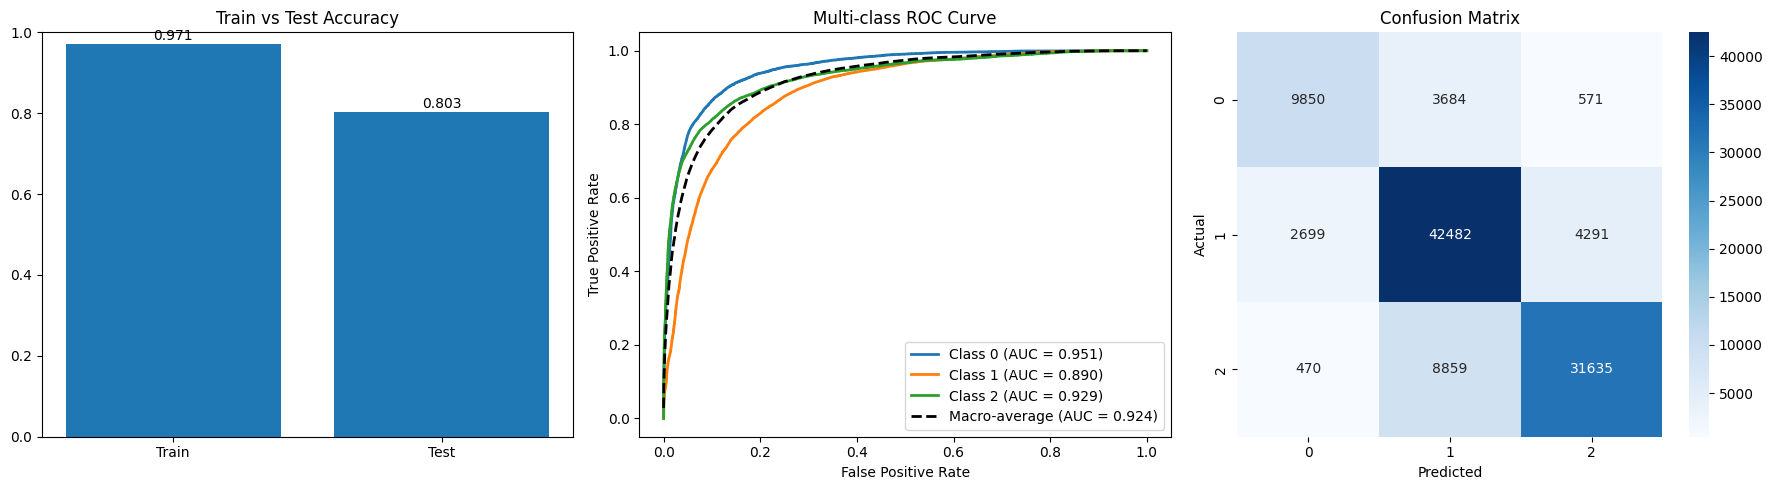

In [14]:
plot_prediction_result(grid_search_rfc.best_estimator_, X_train, y_train, X_test, y_test, 'Random Forest Classifier')

## Model 2: XG Boost

In [21]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# 1. Khởi tạo XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [4, 6, 10],
    'learning_rate': [0.05, 0.1],
}

tscv = TimeSeriesSplit(n_splits=4)

grid_search_xgb = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=tscv,
    n_jobs=-1,
    verbose=2
)

grid_search_xgb.fit(X_train, y_train)

print(f"Tham số tốt nhất tìm được: {grid_search_xgb.best_params_}")
print(f"Điểm số CV tốt nhất: {grid_search_xgb.best_score_:.4f}")

best_model = grid_search_xgb.best_estimator_

Fitting 4 folds for each of 18 candidates, totalling 72 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:08:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Tham số tốt nhất tìm được: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Điểm số CV tốt nhất: 0.8318


Kết quả huấn luyện trên bộ train-test cho: XGBoost
--------------------------------------------------------------------------------
Train Accuracy: 0.9908
Test Accuracy : 0.8054

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74     14105
           1       0.78      0.85      0.82     49472
           2       0.86      0.77      0.82     40964

    accuracy                           0.81    104541
   macro avg       0.80      0.79      0.79    104541
weighted avg       0.81      0.81      0.81    104541

--------------------------------------------------------------------------------


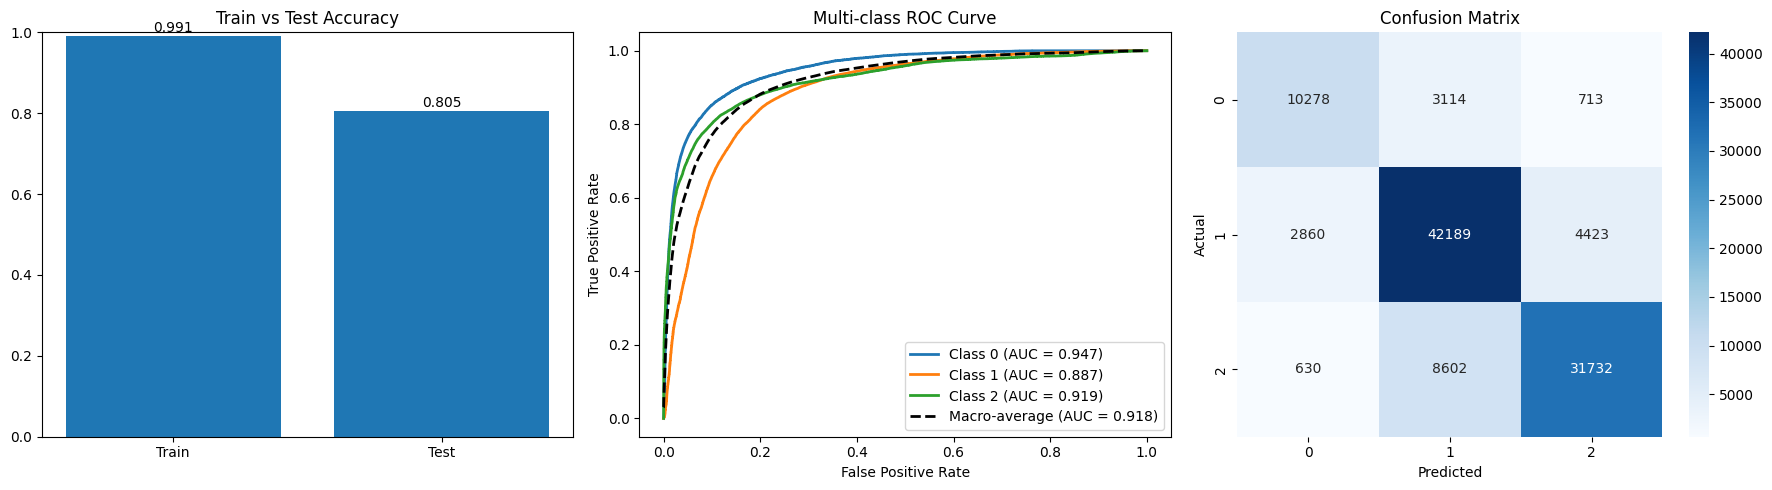

In [22]:
plot_prediction_result(grid_search_xgb.best_estimator_, X_train, y_train, X_test, y_test, 'XGBoost')


## Model 3: Logistic Regression

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# 1. TimeSeriesSplit cho dữ liệu time series
tscv = TimeSeriesSplit(n_splits=4)

# 2. Pipeline scale dữ liệu -> dự đoán
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=1000, multi_class="auto"))
])

# 3. Parameter Grid cho Logistic Regression
param_grid = {
    "lr__C": [0.01, 0.1, 1.0, 10],
    "lr__penalty": ["l2"],
    "lr__solver": ["lbfgs", "saga"],
}

# 4. GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=tscv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)
# 5. Fit
grid_search.fit(X_train, y_train)

# 6. Kết quả
print("Best Params:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Fitting 4 folds for each of 8 candidates, totalling 32 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Params: {'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
Best CV Score: 0.7150462741534341


Kết quả huấn luyện trên bộ train-test cho: Logistic Regression
--------------------------------------------------------------------------------
Train Accuracy: 0.7263
Test Accuracy : 0.6939

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.55      0.58     14105
           1       0.71      0.74      0.73     49472
           2       0.70      0.68      0.69     40964

    accuracy                           0.69    104541
   macro avg       0.67      0.66      0.66    104541
weighted avg       0.69      0.69      0.69    104541

--------------------------------------------------------------------------------


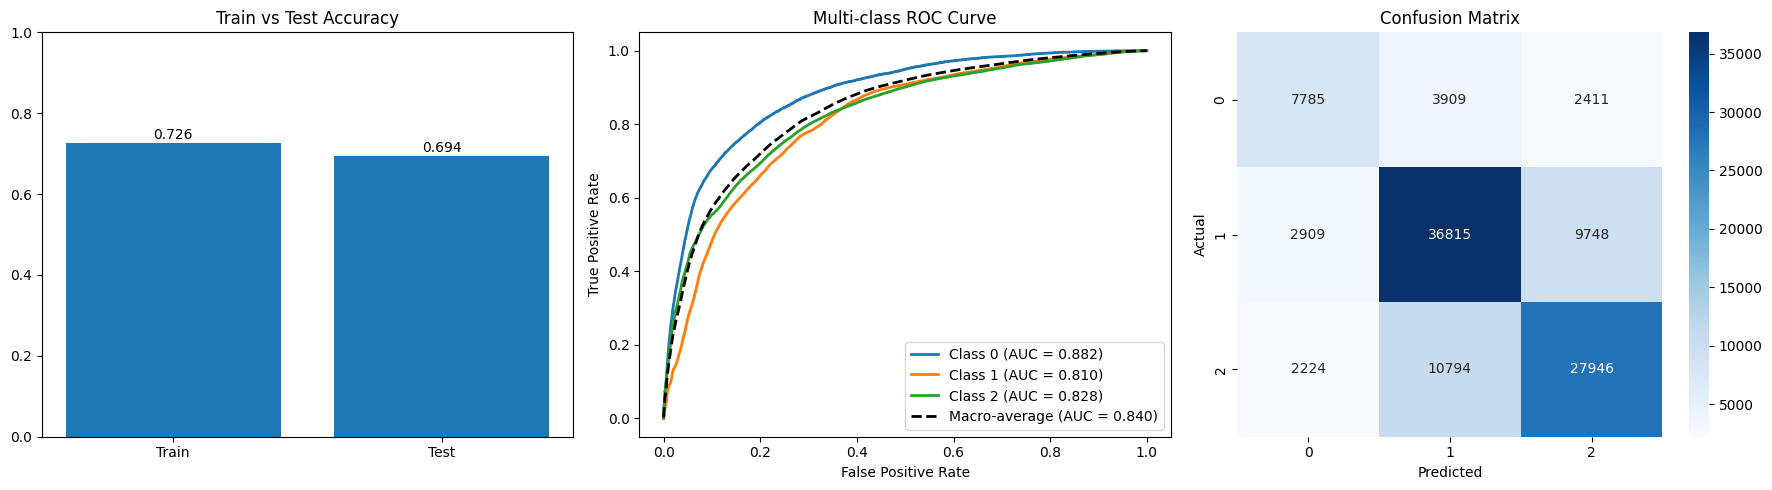

In [45]:
plot_prediction_result(grid_search.best_estimator_, X_train, y_train, X_test, y_test, 'Logistic Regression')
